------ 

# Problem 1 - Midterm

------

Capture at least three images, each one with the same three different objects from different perspectives and using any camera. The images must comply the following requirements:
 
● **Stable background:** without significant textures and with an easily recognizable color as background.

● **Stable illumination:** alluding to a controlled environment.
Process each image according to these directives:

1. Ensure an appropriate amount of illumination through at least three point processing methods, i.e., power-law transformation, piece-linear transformations, histogram equalization.
The implementation must be of your own and not copied from the Internet. Do not use an image processing library.
2. Implement an OpenCV algorithm for histogram equalization and discuss the differences between the results of this step and the previous one.
3. Compute a binary mask for each object in each image. A total of nine masks should be obtained. To show these results, you must present the applied masks over the images, i.e. segmentating the image through the masks.
4. Change the texture of at least two objects in each image. You can use a texture image in this step.
5. If required use complementary stages


----
## 0. Loading Images to the workingspace
----

In this section the captured images will be uploaded and displayed according to the indications of the exercise, even without processing.

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import cv2
import os

%matplotlib inline

# Read the images
images = []
images_gray = []
image_names = []

for image_name in os.listdir('images/'):
  image_names.append(image_name)
  image = cv2.imread('images/'+image_name)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  images.append(image)
  images_gray.append(image_gray)
  # Print out the image dimensions (height, width, and depth (color))
  print(f'Image dimensions for picture {image_name}: {image.shape}')

Image dimensions for picture photo1.jpg: (3024, 3024, 3)
Image dimensions for picture photo2.jpg: (3024, 3024, 3)
Image dimensions for picture photo3.jpg: (3024, 3024, 3)


Now, I will show the images that will be used in this exercise. These images correspond to 3 different objects seen from different perspectives.

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(3):
  plt.subplot(1, 3, i+1)
  image = images[i]
  name = image_names[i]
  plt.imshow(image, 'gray')
  plt.title(name)

Next, I will show the same 3 images in greyscale.

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(3):
  plt.subplot(1, 3, i+1)
  image = images_gray[i]
  name = image_names[i]
  plt.imshow(image, 'gray')
  plt.title(name)

---
## 1. Ensure an appropriate amount of illumination through at least three point processing methods.
---

### Piecewise Linear Transformation


In a firt step in our analysis the Piecewise Linear Transformation will be used, a spatial domain processing method that is used for image quality enhancement. This transformation is defined by the next equation by parts:

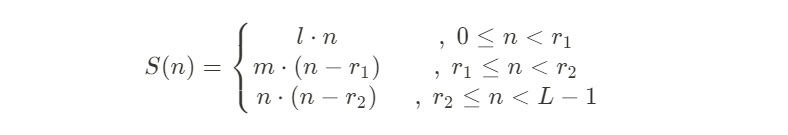

Based on this we can develop the following code to implement this method.


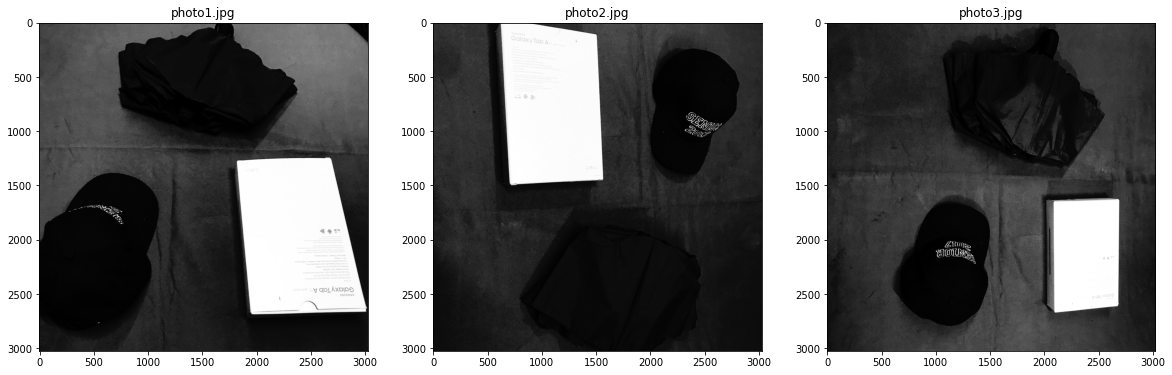

In [ ]:
# Using the equation just defined for PieceWise Transformation
# the next code was written.
def PieceWiseTransformation(pixel_value, r1, s1, r2, s2):
    if (0 <= pixel_value and pixel_value < r1):
        l = (s1 / r1)
        return l * pixel_value
    elif (r1 <= pixel_value and pixel_value < r2):
        m = (s2 - s1)/(r2 - r1)
        return m * (pixel_value - r1) + s1
    else:
        n = ((255 - s2)/(255 - r2))
        return n * (pixel_value - r2) + s2

# To de define the function parameters

s1 = 15
s2 = 235
r1 = 80
r2 = 190

piecewise_images = []

plt.figure(figsize=(20, 10))
for image,i in zip(images_gray,range(3)): 

  # Numpy vectorize to  take a nested sequence of numpy arrays as inputs
  # and returns a single numpy array or a tuple of numpy arrays.
  vectorized_piecewise = np.vectorize(PieceWiseTransformation)  
  # Apply the PieceWise Transformation
  piecewise_image = vectorized_piecewise(image, r1, s1, r2, s2)
  # Convert image values to uint8
  piecewise_image = np.uint8(piecewise_image)
  piecewise_images.append(piecewise_image)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(piecewise_image, 'gray')
  plt.title(name)

The results appear to be good, while you can see that the contrast of the image has been improved, you can also notice a darkening. We will need some method to clarify our picture, so we could think about using the Power-law transformation.

### Power-Law Transformation

As mentioned before, we can use this transformation in the spatial domain to lighten or darken images as needed. Let's remember that power-law transformation is defined by the following equation:

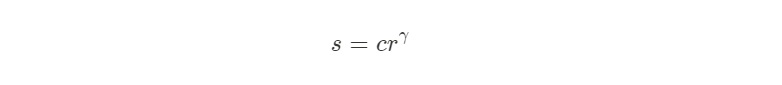


With this in mind we can formulate the following code to process each image using the above equation.

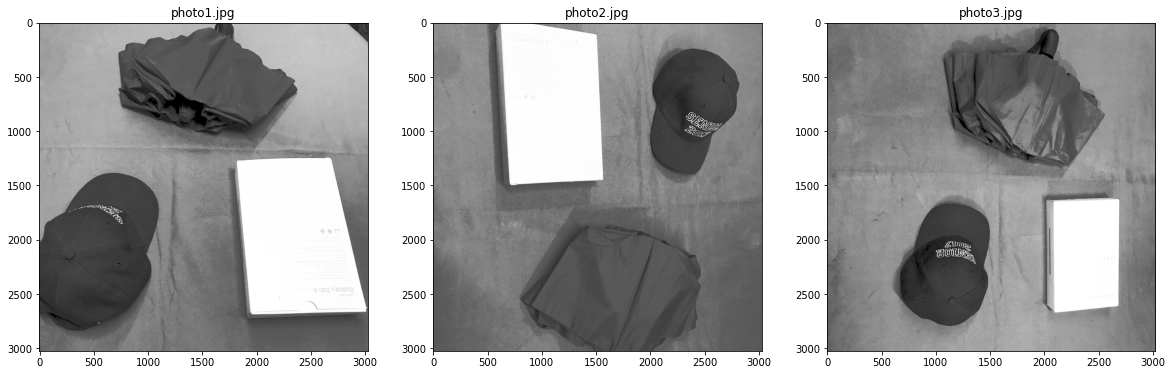

In [ ]:
# define the gamma paramerter
gamma = 0.35
gamma_images = []
plt.figure(figsize=(20, 10))
for image,i in zip(piecewise_images,range(3)):
  # define the transformation equation
  s = 255*(image / 255) ** gamma
  # convert image values to uint8
  gamma_image = np.uint8(s)
  gamma_images.append(gamma_image)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(gamma_image, 'gray')
  plt.title(name)


After several tests, it was determined that the most appropriate value for the gamma correction coefficient would be 0.35. The dark image obtained by working with the piecewise transformation in the previous stage was lightened now, using the power-law transformation.

### Adaptative Sigmoid Contrast enhancement


As a final step, I will use another method of image enhacement in the spatial domain, known as the adaptive sigmoid function method and is defined by the following mathematical function.

sigmoid.jpg


It is said to be an adaptive method as it takes into account statistical measures of the image to be treated, in this case the median.

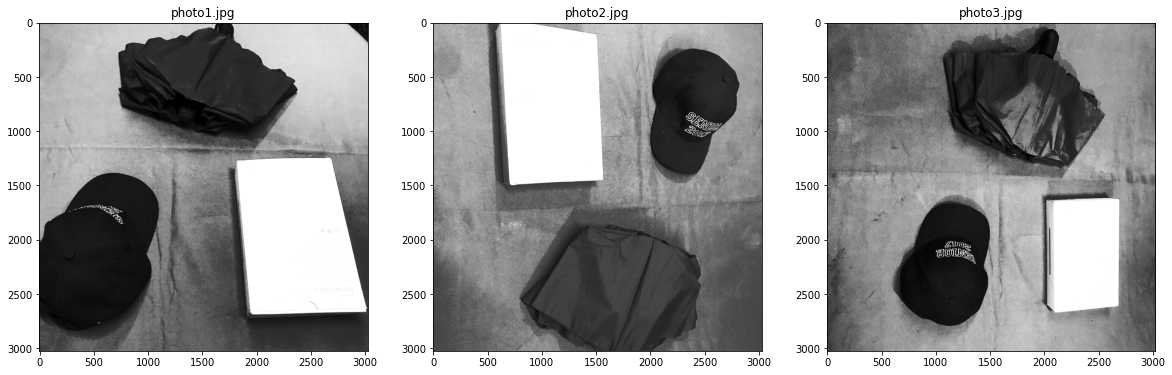

In [ ]:
# define the alpha constant
alpha = 0.03
sigmoid_images = []
plt.figure(figsize=(20, 10))
for image,i in zip(gamma_images,range(3)):
  # convert the image array to 1 dimentional vector
  aux = np.median(np.asarray(image).reshape(-1))
  # apply the sigmoid formula
  sigmoid_image = 255./(1+np.exp(-alpha*(image-aux)));
  # convert image values to uint8
  sigmoid_image = np.uint8(sigmoid_image)
  sigmoid_images.append(sigmoid_image)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(sigmoid_image, 'gray')
  plt.title(name)


Looking only visually at the results, we could say that the visual quality of the image has been improved as desired, even a better contrast is clearly noticeable.

----------
Let's see that through all the processing carried out, the contrast gain achieved with the piecewise transformation, has been somewhat attenuated with the application of the Power-law transformation, although it was possible to recover the contrast with the last method applied, in my opinion, better results could be obtained, that is why I propose the following method as an optional alternative to improve the quality of our images.

### Histogram Processing Contrast Enhancement


This method is based on processing the histogram, modifying its values in the following way: We will have an input histogram, based on this we will generate an ogive shape function, which we will use to transform the histogram values so that they become saturated in their ascending section, in a similar way as it would be done with the sigmoid function before mentioned.

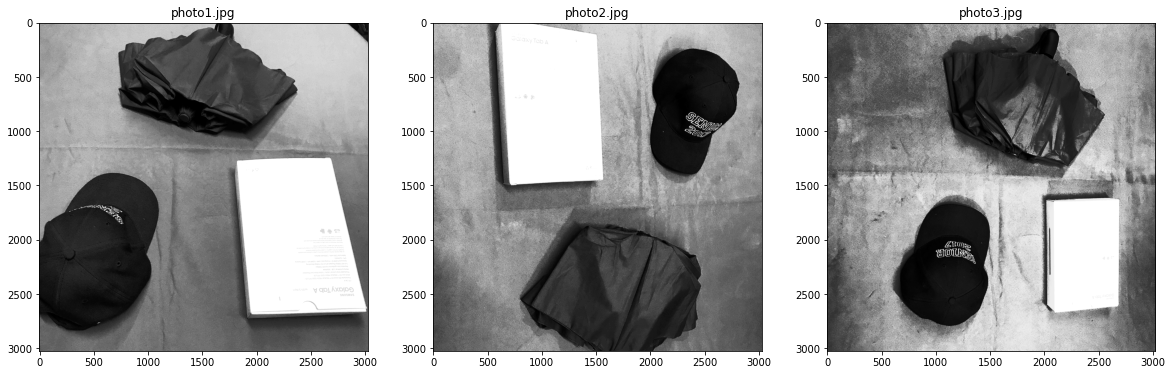

In [ ]:
plt.figure(figsize=(20, 10))
enhanced_images_1 = []
for image,i in zip(sigmoid_images,range(3)): 
  # convert the image values to double for histogram processing
  aux = np.double(image)
  # obtain the number of rows and number of columns
  [r,c] = aux.shape
  # obtain the image area
  N = r*c
  # calculate the image histogram
  fIM = cv2.calcHist([image], [0], None, [256], [0, 256])
  # normalize the image histogram
  hIM = fIM/N
  # calculate an acumulative sum of the histogram elements
  # in order to obtain something similar to an to a warhead graph from the histogram elements
  HIM = np.cumsum(hIM);
  # round to nearest integer towards zero.
  h_new = np.fix(255*HIM);
  image_new = np.zeros((r,c));
  for j in range(0,255):
      image_new = image_new + (j == aux)*h_new[j+1];
  
  image_new = np.uint8(image_new);
  enhanced_images_1.append(image_new)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(image_new, 'gray')
  plt.title(name)


As we can see, the results have improved a lot, since in this case we not only solved the problem of the contrast, improving it a lot, but we also obtained an image with very good illumination.

## 2.  Implement an OpenCV algorithm for histogram equalization.



To solve this stage will be used the **eqhist()** module from the **OpenCV** library. We will simply use the following code.

In [ ]:
eqhist_images = []
plt.figure(figsize=(20, 10))
for image,i in zip(sigmoid_images,range(3)): 
  # apply the histogram equalization module
  equ_image = cv2.equalizeHist(image)
  # convert the image values to uint8
  equ_image = np.uint8(equ_image)
  eqhist_images.append(equ_image)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(equ_image, 'gray')
  plt.title(name)


It is even funny to see that with the last lines of code in the last cell we have managed to obtain results equal to, if not better than the results obtained with all the previous processing steps. In this case, not only the contrast of the image has been clearly improved, but also the illumination and the highlighting of the objects in the image have been improved.

### Appreciation comments


If I had to decide between the two procedures used, I would be inclined to use **histogram equalisation using the OpenCV library**, as the implementation was almost instantaneous and excellent results were achieved. If we wanted to find a low point in using the OpenCV library I would say that this is in the fact that we must use a library external to the python environment (OpenCV), on the other hand, the methods used in the first implementation without using image
processing libraries can be solved, although with much effort, using only matrix operations and loops, even if the numpy library was used it was to make the work easier and faster, although this is not essential.



If we compare the results obtained in both, we could notice that in the implementation of the histogram equalisation using OpenCV the inscriptions on the white object can be seen, which shows a better contrast. With the consideration above, it can be said that the results obtained are quite similar using both methods.

## 3. Compute a binary mask for each object in each image.

To generate a binary mask on the images we will work with we will use the OpenCV library and more specifically the inRange() module which will return 255 if a certain colour is within a specific range of colours and 0 if it is the opposite case. In this way, pixels belonging to objects of a certain colour will be represented by 255 and the remaining pixels by 0.

In addition to the binarisation of the image by colour ranges, morphological operations of erosion and closing will be applied, with the objective of eliminating remaining segments, product of the selection by colour and to fill in some existing empty spaces.

To begin with, we will generate a mask for the blue objects in each of the three images.

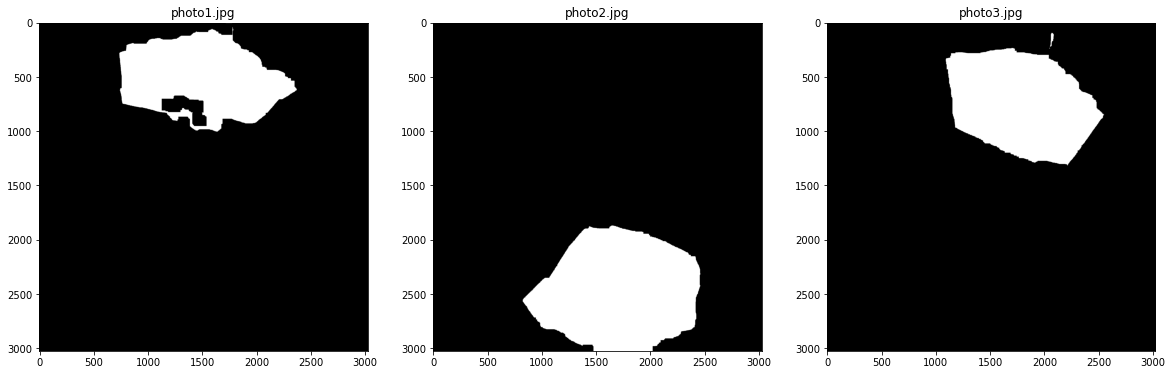

In [ ]:
# Define the color selection boundaries in RGB values
lower_blue = np.array([5,5,40]) 
upper_blue = np.array([40,60,255])

blue_object_masks = []
total_masks = []
plt.figure(figsize=(20, 10))

# define the kernel for the morphological operations
s_2 = np.ones((5,5),np.uint8)

for image,i in zip(images,range(3)):
  # Define a binary mask for blue objects in the image
  blue_mask = cv2.inRange(image, lower_blue, upper_blue)
  # Apply erosion to the image
  blue_mask = cv2.erode(blue_mask, s_2, iterations = 1)
  # Apply clsoing to the image
  blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, s_2, iterations = 20)
  # Apply erosion to the image
  blue_mask = cv2.erode(blue_mask, s_2, iterations = 1)
  blue_object_masks.append(blue_mask)
  total_masks.append(blue_mask)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(blue_mask, 'gray')
  plt.title(name)

As a next step, we will generate a mask for the red objects in each of the three images.

In [ ]:
# Define the color selection boundaries in RGB values
lower_red = np.array([15,5,5]) 
upper_red = np.array([255,50,50])

red_object_masks = []
plt.figure(figsize=(20, 10))

for image,i in zip(images,range(3)):
  # Define a binary mask for black objects in the image
  red_mask = cv2.inRange(image, lower_red, upper_red)
  # Apply closing to the image
  red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, s_2, iterations = 7)
  # Apply erosion to the image
  red_mask = cv2.erode(red_mask, s_2, iterations = 10)
  red_object_masks.append(red_mask)
  total_masks.append(red_mask)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(red_mask, 'gray')
  plt.title(name)

Finally, we will generate a mask for the white objects in each of the three images.

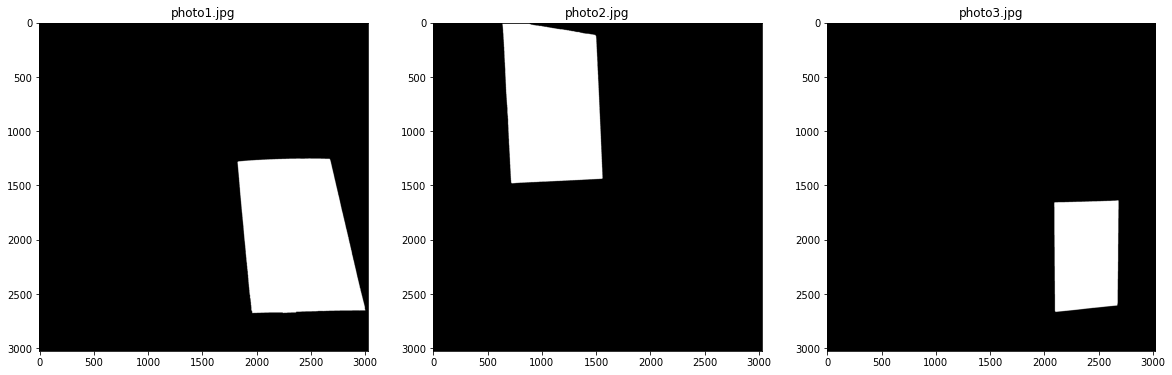

In [ ]:
# Define the color selection boundaries in RGB values
lower_white = np.array([210,210,210]) 
upper_white = np.array([255,255,255])

white_object_masks = []
plt.figure(figsize=(20, 10))

for image,i in zip(images,range(3)):
  # Define a binary mask for white objects in the image
  white_mask = cv2.inRange(image, lower_white, upper_white)
  # Apply erosion to the image
  white_mask = cv2.erode(white_mask, s_2, iterations = 2)
  # Apply closing to the image
  white_mask = cv2.morphologyEx(white_mask, cv2.MORPH_CLOSE, s_2, iterations = 9)
  white_object_masks.append(white_mask)
  total_masks.append(white_mask)
  name = image_names[i]
  plt.subplot(1, 3, i+1)
  plt.imshow(white_mask, 'gray')
  plt.title(name)

To show the results obtained, a **segmentation by colour** of the different objects in each of the 3 images will be shown, in total there are 9 masks and therefore, there will be 9 images where in each one an object will be segmented according to its colour.

In [ ]:
masked_images = []
# define a list for all the mask in groups by color
total_masks_set = [blue_object_masks, red_object_masks, white_object_masks]
plt.figure(figsize=(40, 20))

for color_mask in total_masks_set:
  for mask,image in zip(color_mask,images):
      masked_image = np.copy(image)
      # copies the elements of the original image if their corresponding in
      # mask is 255 otherwise it is copied 0
      masked_image[mask != 255] = [0, 0, 0]
      masked_images.append(masked_image)
      masked_image = np.zeros_like(image)

for masked_image,i in zip(masked_images,range(9)):
  plt.subplot(3, 3, i+1)
  plt.imshow(masked_image)

Although in some cases empty spaces were obtained, this is due to the fact that we are working with real images, which have shadows and depth, so it is possible that dark tones can be confused and therefore, they were not selected.With the images which can be seen in the images above, the colour segmentation was successful.

## Change the texture of at least two objects in each image.

To change the texture of the objects in the original images we will work with the masks generated in the previous stage.

The textures to be used are the next ones.

In [ ]:
textures = []
texture_names = []
for texture_name in os.listdir('textures/'):
  texture_names.append(texture_name)
  texture = cv2.imread('textures/'+texture_name)
  texture = cv2.cvtColor(texture,cv2.COLOR_BGR2RGB)
  textures.append(texture)

plt.figure(figsize=(20, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  name = texture_names[i]
  texture = textures[i]
  plt.imshow(texture, 'gray')
  plt.title(name)

As we can see, the textures are quite varied.What we will do next is quite similar to the previous step to segment the images, in this case instead of copying the values of the original image we will copy the values of the textures.

In [ ]:
mask_textures = []
plt.figure(figsize=(40, 20))
for mask,texture in zip(total_masks,textures):
    masked_texture = np.copy(texture)
    # copies the elements of the texture image if their corresponding in
    # mask is 255 otherwise it is copied 0
    masked_texture[mask != 255] = [0, 0, 0]
    mask_textures.append(masked_texture)
    masked_texture = np.zeros_like(image)

for masked_texture,i in zip(mask_textures,range(9)):
  plt.subplot(3, 3, i+1)
  plt.imshow(masked_texture)

As you can see, we managed to replace the original texture of the objects in the image with the textures mentioned above. The next thing to do is to put all the objects that correspond to one of the three images back together again, to do this we simply add up the results obtained previously as appropriate.

In [ ]:
textures_mask_images = [mask_textures[0] + mask_textures[3] + mask_textures[6],
                        mask_textures[1] + mask_textures[4] + mask_textures[7],
                        mask_textures[2] + mask_textures[5] + mask_textures[8]]

plt.figure(figsize=(20, 10))
for i in range(3):
  plt.subplot(1, 3, i+1)
  image = textures_mask_images[i]
  plt.imshow(image)

To avoid being left with a black background we will use a background image, although we could use the background of the original image, it will look better if we use a spatial background.

In [ ]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('background.jpg')
background_images = [np.copy(background_image), np.copy(background_image), np.copy(background_image)]
image_masks = []
plt.figure(figsize=(20, 10))
for i,background in zip(range(3),background_images):
  image_mask = blue_object_masks[i]+red_object_masks[i]+white_object_masks[i]
  background[image_mask == 255] = [0, 0, 0]
  plt.subplot(1, 3, i+1)
  plt.imshow(background)

Now we have a background image with the empty spaces to be filled with the objects with the modified textures.

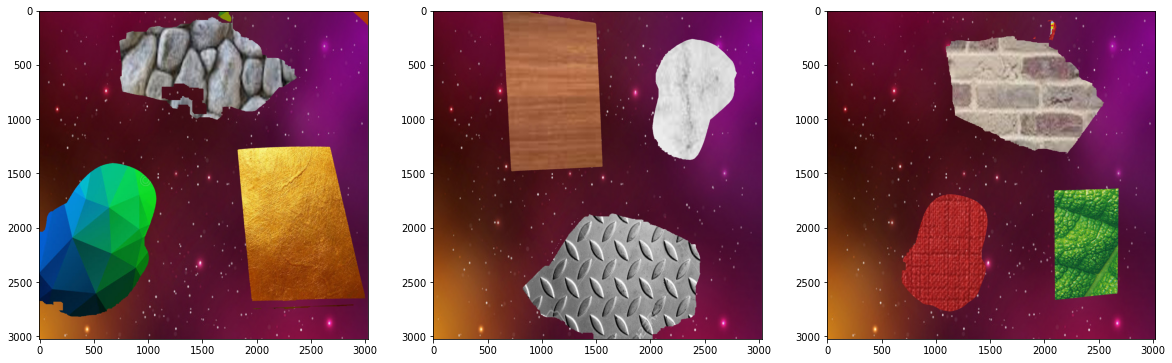

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(3):
  plt.subplot(1, 3, i+1)
  final_image = background_images[i] + textures_mask_images[i]
  plt.imshow(final_image)

The final result of the processing can be seen in the images above, it was possible to change the textures of the 3 objects present in each of the 3 images, in addition to changing the background.